In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
#case frequency:
#df_prueba.groupby('General activity')['case:concept:name'].agg(['unique'])['unique'].apply(lambda x: len(x)).sort_values(ascending=False)

In [2]:
df_tipo=pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_tipo

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Year,Type
0,A1 P2 BPI 2020,A1 P2 BPI 2020,Calculate cycle time,Calculate cycle time of the whole process for ...,2021-11-09 16:37:03.500187,P2,2020,Analyze Cycle Time
1,A1 P2 BPI 2020,A1 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 17:37:03.500187,P2,2020,Analyze Cycle Time
2,A2 P2 BPI 2020,A2 P2 BPI 2020,Calculate cycle time,Get cycle time from the previous question,2021-11-09 18:37:03.500187,P2,2020,Analyze Cycle Time
3,A2 P2 BPI 2020,A2 P2 BPI 2020,Compare cycle time,Compare cycle time,2021-11-09 19:37:03.500187,P2,2020,Analyze Cycle Time
4,A7 P2 BPI 2020,A7 P2 BPI 2020,Calculate throughput,Calculate throughput,2021-11-09 20:37:03.500187,P2,2020,Analyze Cycle Time
...,...,...,...,...,...,...,...,...
943,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by year,2021-12-18 23:37:03.500187,P1,2020,Manipulation
944,A19 P1 BPI 2020,A19 P1 BPI 2020,Group traces,Group traces by activities,2021-12-19 00:37:03.500187,P1,2020,Manipulation
945,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate statistics,Calculate Statistics of activities,2021-12-19 01:37:03.500187,P1,2020,Calculate statistics
946,A19 P1 BPI 2020,A19 P1 BPI 2020,Calculate throughput,Calculate throughput,2021-12-19 02:37:03.500187,P1,2020,Analyze Cycle Time


In [3]:
df_tipo['concept:name'].value_counts().mean()

16.928571428571427

In [4]:
df_tipo.groupby(['Type'])['concept:name'].value_counts()

Type                  concept:name                                                 
Analyze Cycle Time    Calculate cycle time                                             157
                      Identify bottlenecks                                              61
                      Compare cycle time                                                30
                      Calculate waiting time                                            27
                      Calculate throughput                                              18
                      Calculate processing time                                          9
                      Comparative of throughput                                          2
                      Compare waiting time with processing time                          2
                      Analyze cycle time depending on the events                         1
                      Calculate intervals of time of the traces                          1
      

In [6]:
d = df_tipo.groupby(['Type', 'concept:name'])
for n, g in d:
    print(n, len(g['Variant'].unique()))

('Analyze Cycle Time', 'Analyze cycle time depending on the events') 1
('Analyze Cycle Time', 'Calculate cycle time') 13
('Analyze Cycle Time', 'Calculate intervals of time of the traces') 1
('Analyze Cycle Time', 'Calculate processing time') 1
('Analyze Cycle Time', 'Calculate throughput') 1
('Analyze Cycle Time', 'Calculate waiting time') 1
('Analyze Cycle Time', 'Comparative of throughput') 1
('Analyze Cycle Time', 'Compare cycle time') 1
('Analyze Cycle Time', 'Compare processing time') 1
('Analyze Cycle Time', 'Compare waiting time with processing time') 1
('Analyze Cycle Time', 'Identify bottlenecks') 5
('Calculate statistics', 'Calculate average of activities per trace') 1
('Calculate statistics', 'Calculate frequency') 7
('Calculate statistics', 'Calculate number of elements') 7
('Calculate statistics', 'Calculate percentages') 4
('Calculate statistics', 'Calculate statistics') 4
('Identification', 'Identify activities') 4
('Identification', 'Identify attributes') 3
('Identific

In [7]:
df_tipo['concept:name'].value_counts().mean()

16.928571428571427

In [8]:
df_tipo['concept:name'].value_counts().head(16)

Calculate cycle time            157
Filter traces                    83
Calculate number of elements     76
Identify bottlenecks             61
Group traces                     58
Calculate percentages            55
Represent process map            47
Represent bar charts             36
Calculate statistics             35
Identify attributes              34
Represent histograms             32
Compare cycle time               30
Calculate waiting time           27
Represent temporal series        25
Calculate frequency              23
Calculate throughput             18
Name: concept:name, dtype: int64

(array([5., 4., 3., 1., 2., 0., 0., 0., 0., 1.]),
 array([ 18. ,  31.9,  45.8,  59.7,  73.6,  87.5, 101.4, 115.3, 129.2,
        143.1, 157. ]),
 <BarContainer object of 10 artists>)

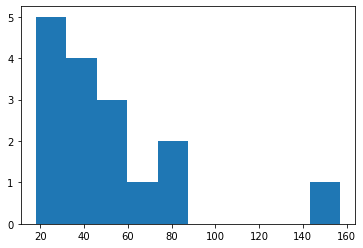

In [9]:
plt.hist(df_tipo['concept:name'].value_counts().head(16))

In [10]:
df_tipo['Variant'].value_counts().head(10)

Filter traces by activities                                                  44
Calculate percentage of traces                                               42
Identify activities as bottlenecks applying temporal performance criteria    40
Calculate number of traces                                                   39
Represent process map with cycle time                                        35
Compare cycle time                                                           30
Represent histograms of cycle time                                           29
Calculate waiting time                                                       27
Identify values of attributes                                                21
Calculate cycle time of the whole process for all traces                     21
Name: Variant, dtype: int64

In [22]:
df_tipo['Variant'].unique()

array(['Calculate cycle time of the whole process for all traces',
       'Compare cycle time', 'Get cycle time from the previous question',
       'Calculate throughput', 'Comparative of throughput',
       'Represent scatterplot', 'Represent boxplots of cycle time',
       'Preprocess the traces of the logs',
       'Calculate cycle time of only a subset of pairs of events for all traces',
       'Identify specific subprocesses',
       'Calculate Statistics of cycle time',
       'Represent histograms of cycle time',
       'Calculate cycle time of a fragment of the process for all traces',
       'Calculate number of traces', 'Calculate number of activities',
       'Calculate average of activities per trace',
       'Calculate percentage of traces',
       'Calculate Statistics of attributes',
       'Group traces depending on attributes',
       'Represent histograms of attributes',
       'Represent bar charts of traces', 'Filter traces by activities',
       'Filter activities 

###  Variantes del top 5 Operaciones más frecuentes

In [12]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate cycle time']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate cycle time']['Variant'].value_counts().mean())

Calculate cycle time of the whole process for all traces                              21
Calculate cycle time of a fragment of the process for a subset of traces              20
Calculate cycle time of the whole process for each subset of traces                   19
Calculate cycle time of the whole process for a subset of traces                      17
Calculate cycle time for all pairs of events for all traces                           16
Get cycle time from the previous question                                             13
Calculate cycle time of only a subset of pairs of events for a subset of traces        9
Calculate cycle time for all pairs of events for a subset of traces                    8
Calculate cycle time for all pairs of events for each subset of traces                 8
Calculate cycle time of a fragment of the process for all traces                       8
Calculate cycle time of only a subset of pairs of events for each subset of traces     7
Calculate cycle time 

In [13]:
print(df_tipo[df_tipo['concept:name'] == 'Filter traces']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Filter traces']['Variant'].value_counts().mean())

Filter traces by activities                           44
Filter traces by attributes                           15
Filter traces by cycle time                            8
Filter traces by frequency                             7
Filter traces by year                                  6
Filter traces depending on the order of activities     2
Filter traces by subprocesses                          1
Name: Variant, dtype: int64
11.857142857142858


In [14]:
print(df_tipo[df_tipo['concept:name'] == 'Calculate number of elements']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Calculate number of elements']['Variant'].value_counts().mean())

Calculate number of traces                            39
Calculate number of activities                        14
Calculate number of events                            10
Calculate number of sub-processes                      5
Calculate number of variants                           4
Calcute number of values of an attribute               3
Calculate number of different organizational units     1
Name: Variant, dtype: int64
10.857142857142858


In [15]:
print(df_tipo[df_tipo['concept:name'] == 'Identify bottlenecks']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Identify bottlenecks']['Variant'].value_counts().mean())

Identify activities as bottlenecks applying temporal performance criteria                             40
Identify sub-processes as bottlenecks applying temporal performance criteria                          11
Identify organizational units as bottlenecks applying temporal performance criteria                    5
Identify sub-processes with incorrect orders with respect to the happy path as bottlenecks             4
Identify activities as bottlenecks applying temporal performance criteria and statistical measures     1
Name: Variant, dtype: int64
12.2


In [16]:
print(df_tipo[df_tipo['concept:name'] == 'Group traces']['Variant'].value_counts())
print(df_tipo[df_tipo['concept:name'] == 'Group traces']['Variant'].value_counts().mean())

Group traces depending on attributes                      21
Group traces by activities                                17
Group traces by year                                       5
Group traces by cycle time                                 4
Group traces by resources                                  2
Group traces by sub-processes                              2
Group traces by month                                      2
Group traces according to the repetition of activities     1
Group traces by waiting                                    1
Group traces by organizational units                       1
Group traces by roles                                      1
Group traces by endpoints                                  1
Name: Variant, dtype: int64
4.833333333333333


### Análisis de variantes

In [17]:
v = df_tipo.groupby(by=['concept:name'])
variantes = v.apply(lambda x: len(x["Variant"].unique()))

In [18]:
variantes.sort_values()

concept:name
Analyze cycle time depending on the events                        1
Represent scatterplot                                             1
Group events by time                                              1
Group organizational units                                        1
Group sub-processes                                               1
Identify impact of bottlenecks by organizational unit             1
Identify specific subprocesses                                    1
Identify traces by cycle time                                     1
Identify transitions by cycle time                                1
Preprocess the events of the logs                                 1
Preprocess the traces of the logs                                 1
Represent boxplots of cycle time                                  1
Represent circular charts of attributes of the traces             1
Represent correlation graph of variables                          1
Represent density of cycle time    

(array([35.,  2.,  5.,  7.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.]),
 array([ 0.5       ,  1.46428571,  2.42857143,  3.39285714,  4.35714286,
         5.32142857,  6.28571429,  7.25      ,  8.21428571,  9.17857143,
        10.14285714, 11.10714286, 12.07142857, 13.03571429, 14.        ]),
 <BarContainer object of 14 artists>)

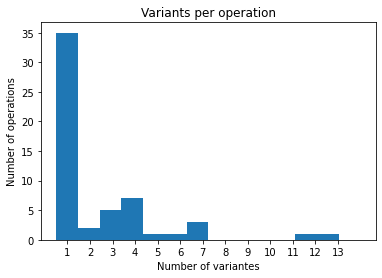

In [19]:
fig, ax = plt.subplots()
# ax.axis("off")
plt.title('Variants per operation')
plt.xlabel('Number of variantes')
plt.ylabel('Number of operations')
plt.xticks(np.arange(1, 14, 1.0))
plt.hist(variantes, 14, range=[0.5, 14])


In [20]:
df_tipo['Variant'].value_counts().mean()

6.820143884892087

In [24]:
frec_variants=df_tipo['Variant'].value_counts()#.head(25)

In [30]:
frec_variants_manip=df_tipo[df_tipo['Type']=="Calculate statistics"]['Variant'].value_counts()
frec_variants_manip[frec_variants_manip>6.82]

Calculate percentage of traces           42
Calculate number of traces               39
Calculate Statistics of cycle time       18
Calculate number of activities           14
Calculate number of events               10
Calculate Statistics of throughput        9
Calculate percentage of sub-processes     7
Calculate frequency of activities         7
Calculate Statistics of attributes        7
Name: Variant, dtype: int64

In [32]:
frec_variants_manip=df_tipo[df_tipo['Type']=="Identification"]['Variant'].value_counts()
frec_variants_manip[frec_variants_manip>6.82]

Identify values of attributes         21
Identify attributes by cycle time     12
Identify transitions by cycle time    10
Name: Variant, dtype: int64